In [1]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 

In [2]:
def extract_data(filename):
    df = pandas.read_csv(filename)
    ydata = df.T1.values - df.T1[0]
    udata = df.Q1.values - df.Q1[0]
    t = numpy.arange(len(df)-1)
    return ydata, udata, t

In [3]:
def ARMAX(filename):
    ydata, udata, t = extract_data(filename)
    ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit()
    y_armax = ARMA_results.predict(0, len(t)-1, udata) + 21
    print(y_armax[0])
    return y_armax

In [4]:
def Results(filename):
    y_armax = ARMAX(filename)
    print(y_armax[0])
    df = pandas.read_csv(filename)
    t = numpy.arange(len(df)-1)
    plt.plot(df.Time, df.T1, '.', label = 'observation')
    plt.plot(t, y_armax, label = 'ARX prediction')
    plt.ylabel('Temperature 1 (degress celcius)')
    plt.xlabel('Time (s)')
    plt.title(filename)
    plt.legend()
    plt.show()

C:\Users\annam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


21.708223645854144
21.708223645854144


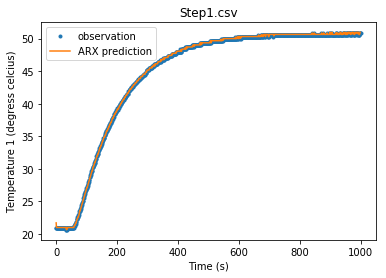

In [5]:
Results("Step1.csv")

22.58664067353002
22.58664067353002


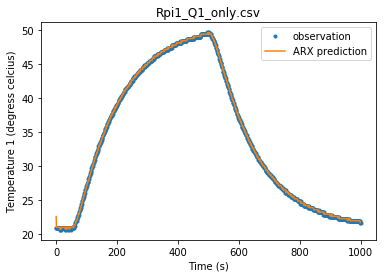

In [6]:
Results("Rpi1_Q1_only.csv")

35.40510733437676
35.40510733437676


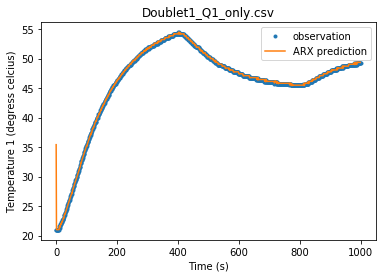

In [7]:
Results("Doublet1_Q1_only.csv")

In [17]:
df = pandas.read_csv("Step1.csv")
udata = df.Q1 - df.Q1[0]
ydata = df.T1 - df.T1[0]
t = numpy.arange(len(df)-1)
ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit()
ARMA_results.summary()

C:\Users\annam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     T1   No. Observations:                 1001
Model:                     ARMA(2, 1)   Log Likelihood                 527.363
Method:                       css-mle   S.D. of innovations              0.142
Date:                Mon, 04 Feb 2019   AIC                          -1042.726
Time:                        14:20:38   BIC                          -1013.273
Sample:                             0   HQIC                         -1031.532
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7082      0.019     36.963      0.000       0.671       0.746
Q1          3.299e-06      0.003      0.001      0.999      -0.005       0.005
ar.L1.T1       0.6004   8.17e-06   7.35e+04      0.000       0.600       0.600
ar.L2.T1       0.3996   5.44e-06   7.35e+04      0.000       0.400       0.400
ma.L1.T1       0.0924      0.030      3.082      0.002       0.034       0.151
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
AR.2           -2.5022           +0.0000j            2.5022            0.5000
MA.1          -10.8175           +0.0000j           10.8175            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
cst, q1, ar1, ar2, ma = ARMA_results.params

### Trying to understand how .predict works:

In [18]:
ARMA_results.params

const       0.708224
Q1          0.000003
ar.L1.T1    0.600359
ar.L2.T1    0.399641
ma.L1.T1    0.092443
dtype: float64

In [20]:
# Step response
df = pandas.read_csv('Step1.csv')

t = numpy.arange(len(df)-1)
us = udata #- udata[0]  # deviation variables
y_arx = []
y_t = y_1 = y_2 = ϵ_t = ϵ_1 = 0
for i, ti in enumerate(t):
    u_1 = 0 if i < 1 else us[i-1]
    T_t = (1/3)*(y_t + y_1 + y_2)
    ϵ_1, ϵ_t = ϵ_t, y_t - T_t
    y_2, y_1 = y_1, y_t
    y_t = ar1*y_1 + ar2*y_2 + ma*ϵ_1 + ϵ_t + q1*u_1
    y_arx.append(y_t)

y_arxfit = numpy.array(y_arx) + 21  #  switch back from deviation variables


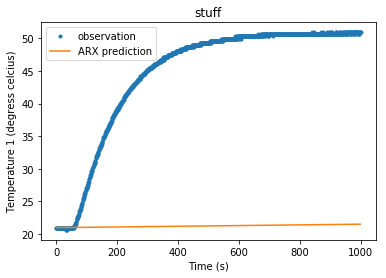

In [21]:

plt.plot(df.Time, df.T1, '.', label = 'observation')
plt.plot(t, y_arxfit, label = 'ARX prediction')
plt.ylabel('Temperature 1 (degress celcius)')
plt.xlabel('Time (s)')
plt.title('stuff')
plt.legend()
plt.show()

In [23]:
ARMA_results.predict??